In [ ]:
import pickle

import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

import warnings

from ofex.classical_algorithms.filter_functions import gaussian_function_fourier, chebyshev_filter_fourier, \
    kaiser_filter_fourier, chebyshev_fluctuation, kaiser_fluctuation
from ofex.classical_algorithms.funcapprox import plot_functions

warnings.filterwarnings("ignore")

In [ ]:
mol_name, transform = "H4", "symmetry_conserving_bravyi_kitaev"
filter_fname = f"./filter_data/{mol_name}_{transform}_filter_parameters.pkl"

with open(filter_fname, 'rb') as f:
    filter_parameter_list = pickle.load(f)

In [12]:
center_list = list()
width_list = list()
for (c, w), (n_fourier, w_gaussian, alpha_kaiser) in filter_parameter_list.items():
    if c not in center_list:
        center_list.append(c)
    if w not in width_list:
        width_list.append(w)

center_list = sorted(center_list)
width_list = sorted(width_list)

min_width = min(width_list)

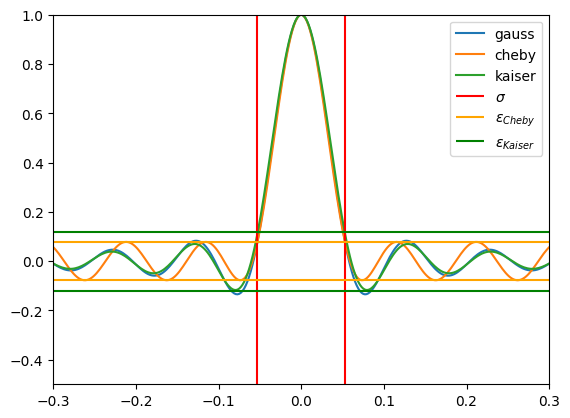

In [13]:
center, width = center_list[len(center_list) // 2], min_width
period = 4.0

n_fourier, w_gaussian, alpha_kaiser = filter_parameter_list[(center, width)]
gauss, _, _ = gaussian_function_fourier(n_fourier, w_gaussian, 0.0, period)
cheby, _, _ = chebyshev_filter_fourier(n_fourier, width, 0.0, period, high_order_repr=True)
kaiser, _, _ = kaiser_filter_fourier(n_fourier, alpha_kaiser, 0.0, period)

cheby_fluc = chebyshev_fluctuation(n_fourier, width, period)
ksr_fluc = kaiser_fluctuation(alpha_kaiser)

x = sp.Symbol("x")

if n_fourier > 60:
    axes = plot_functions({"gauss": sp.Abs(gauss), "cheby": sp.Abs(cheby), "kaiser": sp.Abs(kaiser)},
                            x, x_points=np.linspace(-1, 1, 1000), plot=False)
else:
    axes = plot_functions({"gauss":gauss, "cheby":cheby, "kaiser":kaiser}, x, x_points=np.linspace(-1, 1, 1000), plot=False)

for ax in axes:
    if n_fourier > 60:
        ax.set_ylim(1e-5, 1.0)
        ax.set_yscale('log')
    else:
        ax.set_ylim(-0.5, 1.0)
    ax.vlines((-width, width), -0.5, 1.0, color="red", label=r"$\sigma$")
    ax.hlines((-cheby_fluc, cheby_fluc), -1, 1, color="orange", label=r"$\epsilon_{Cheby}$")
    ax.hlines((-ksr_fluc, ksr_fluc), -1, 1, color="green", label=r"$\epsilon_{Kaiser}$")
    ax.set_xlim(-0.3, 0.3)
plt.legend()
plt.show()